### Importing Libraries

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline 

# preprocessing
from sklearn.preprocessing import StandardScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# model tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier


# class imbalance
from sklearn.dummy import DummyClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# evaluating models
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

# the ultimate
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('preprocessed_cutomer_data.csv',index_col=0)
extra_features = pd.read_csv('new_features.csv',index_col=0)

### Train test split

In [166]:
X = df.drop(columns=['churn'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=10)

### Scaling

In [167]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=[X_train.columns])
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=[X_test.columns])

### Class Imbalance

Here I am using the SMOTE (Synthetic Minority Oversampling Technique) method

In [168]:
sm = SMOTE(random_state=23)
X_train_SM, y_train_SM = sm.fit_sample(X_train_scaled, y_train)
X_train_SM = pd.DataFrame(X_train_SM,columns=X_train_scaled.columns)

## Modeling

To keep track of the models and there scores

In [227]:
models_data = []

In [326]:
def scoreboard(classifier,y_true, y_pred):
    ''' 
    returns classifier name, params and
    calculates and returns Accuracy, F1 score, Precision, and Recall using sklearn
    '''    
    model_summary = {'Model': classifier,
                     'Params': classifier.get_params(),
                     'Accuracy':accuracy_score(y_true, y_pred),
                     'F1_score':f1_score(y_true, y_pred),
                     'Precision':precision_score(y_true, y_pred),
                     'Recall':recall_score(y_true, y_pred)}

    models_data.append(model_summary)
    return model_summary

def justscore(y_true, y_pred):
    ''' 
    
    calculates and returns Accuracy, F1 score, Precision, and Recall using sklearn
    '''    
    model_summary = {
                     
                     'Accuracy':accuracy_score(y_true, y_pred),
                     'F1_score':f1_score(y_true, y_pred),
                     'Precision':precision_score(y_true, y_pred),
                     'Recall':recall_score(y_true, y_pred)}


    return model_summary

### Logistic Regression

Base logistic regression

In [228]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train_SM,y_train_SM)
lr_preds = lr.predict(X_test_scaled)
scoreboard(lr,y_test,lr_preds)

{'Accuracy': 0.7481259370314842,
 'F1_score': 0.45098039215686275,
 'Model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'Params': {'C': 1.0,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 100,
  'multi_class': 'warn',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': None,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False},
 'Precision': 0.32701421800947866,
 'Recall': 0.7263157894736842}

### Knn

Base knn

In [229]:
knn = KNeighborsClassifier()
knn.fit(X_train_SM,y_train_SM)
knn_preds = knn.predict(X_test_scaled)
scoreboard(knn,y_test,knn_preds)

{'Accuracy': 0.7931034482758621,
 'F1_score': 0.49635036496350365,
 'Model': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'Params': {'algorithm': 'auto',
  'leaf_size': 30,
  'metric': 'minkowski',
  'metric_params': None,
  'n_jobs': None,
  'n_neighbors': 5,
  'p': 2,
  'weights': 'uniform'},
 'Precision': 0.37988826815642457,
 'Recall': 0.7157894736842105}

### Support Vector

In [230]:
svc = SVC()
svc.fit(X_train_SM,y_train_SM)
svc_preds = svc.predict(X_test_scaled)
scoreboard(svc,y_test,svc_preds)

{'Accuracy': 0.9025487256371814,
 'F1_score': 0.6733668341708543,
 'Model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='rbf', max_iter=-1, probability=False, random_state=None,
     shrinking=True, tol=0.001, verbose=False),
 'Params': {'C': 1.0,
  'cache_size': 200,
  'class_weight': None,
  'coef0': 0.0,
  'decision_function_shape': 'ovr',
  'degree': 3,
  'gamma': 'auto_deprecated',
  'kernel': 'rbf',
  'max_iter': -1,
  'probability': False,
  'random_state': None,
  'shrinking': True,
  'tol': 0.001,
  'verbose': False},
 'Precision': 0.6442307692307693,
 'Recall': 0.7052631578947368}

### Decision tree

Base Decision tree

In [231]:
dt = DecisionTreeClassifier()
dt.fit(X_train_SM,y_train_SM)
dt_preds = dt.predict(X_test_scaled)
scoreboard(dt,y_test,dt_preds)

{'Accuracy': 0.8950524737631185,
 'F1_score': 0.6759259259259259,
 'Model': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 'Params': {'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'presort': False,
  'random_state': None,
  'splitter': 'best'},
 'Precision': 0.6033057851239669,
 'Recall': 0.7684210526315789}

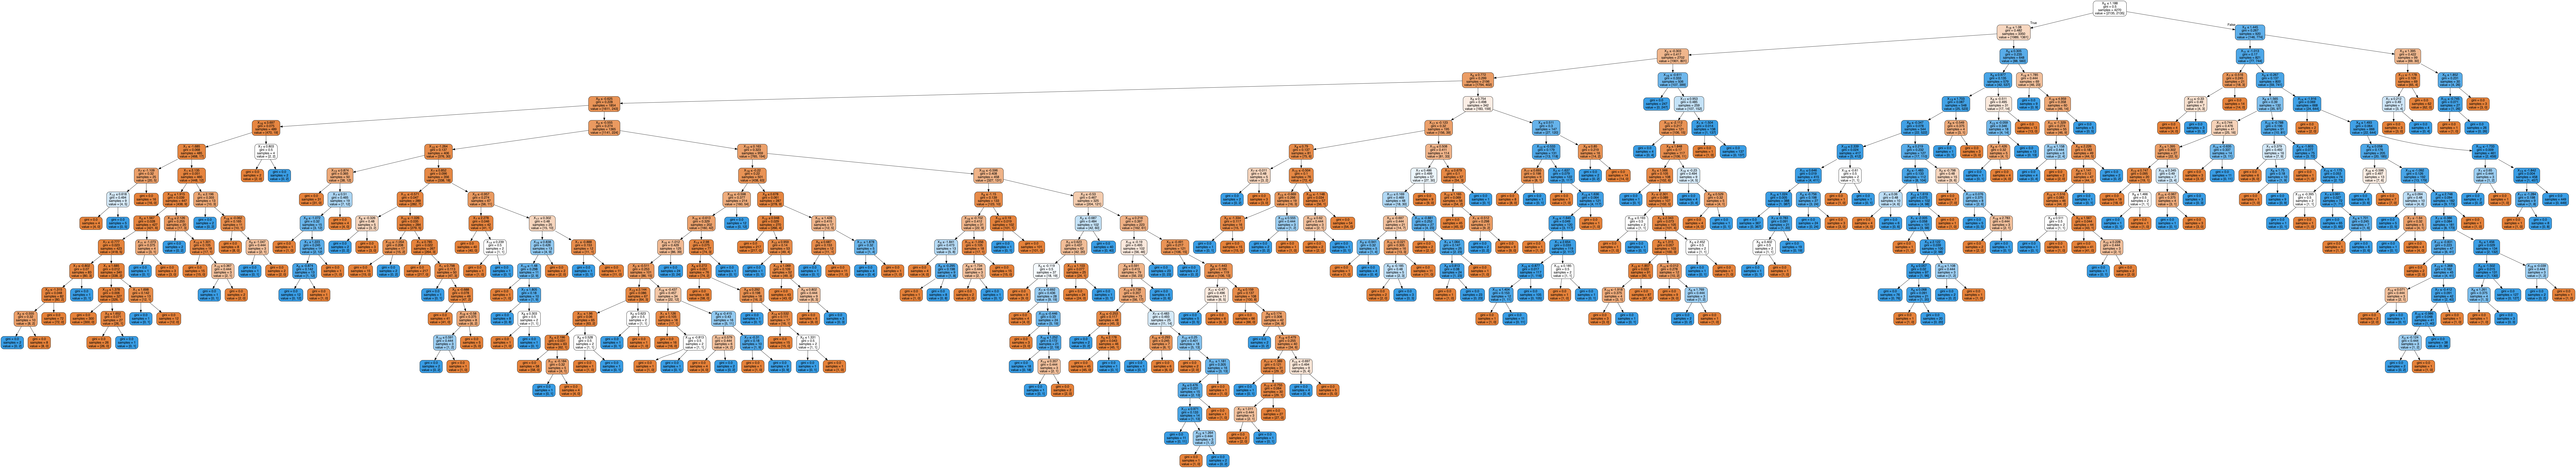

In [138]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Gridsearch

Gridsearch through decision tree

In [173]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[1,2,5,10]}
gs = GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,verbose=1,cv=5)
gs.fit(X_train_SM,y_train_SM)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 5, 10]},
             pre_dispat

In [232]:
gsb = gs.best_estimator_

In [233]:
gs_preds = gs.best_estimator_.predict(X_test_scaled)
scoreboard(gs,y_test,gs_preds)

{'Accuracy': 0.9220389805097451,
 'F1_score': 0.7263157894736842,
 'Model': GridSearchCV(cv=5, error_score='raise-deprecating',
              estimator=DecisionTreeClassifier(class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features=None,
                                               max_leaf_nodes=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               presort=False, random_state=None,
                                               splitter='best'),
              iid='warn', n_jobs=None,
              param_grid={'criterion': ('gini', 

### Random Forest

In [234]:
rf = RandomForestClassifier(n_estimators=1000,random_state=23)
rf.fit(X_train_SM,y_train_SM)
rf_preds = rf.predict(X_test_scaled)
scoreboard(rf,y_test,rf_preds)

{'Accuracy': 0.9430284857571214,
 'F1_score': 0.8020833333333334,
 'Model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=1000,
                        n_jobs=None, oob_score=False, random_state=23, verbose=0,
                        warm_start=False),
 'Params': {'bootstrap': True,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 'auto',
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 1000,
  'n_jobs': None,
  'oob_score': False,
  'random_state': 23,
  'verbose': 0,
  'warm_start': False},
 '

### Gridsearch through Random Forest

In [ ]:
grf = RandomForestClassifier()
gsrf_params = {'bootstrap':[True, False],
               'criterion':['gini','entropy'],
               'max_depth':[None,1,5,10,25],
               'max_features':['auto',3,8,17],
               'max_leaf_nodes':[None,2,5,10],
               'min_impurity_split':[None,.001,.1,1],
               'min_samples_leaf':[1,5,10] ,
               'min_samples_split':[2,5,10] ,
               'n_estimators':[10,50],
               'random_state':[23],
               'warm_start':[False,True],
               'class_weight':[None,'balanced']}
gs_rf = GridSearchCV(grf,gsrf_params,verbose=1,n_jobs=-1)

>Warning: This cell can take a very long time to run!

In [196]:
# gs_rf.fit(X_train_SM,y_train_SM)

In [202]:
gs_rf_result  = RandomForestClassifier(bootstrap=False, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=3,
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

In [235]:
gs_rf_result.fit(X_train_SM,y_train_SM)
gs_rf_preds = gs_rf_result.predict(X_test_scaled)
scoreboard(gs_rf_result,y_test,gs_rf_preds)

{'Accuracy': 0.9505247376311844,
 'F1_score': 0.8176795580110496,
 'Model': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                        max_depth=None, max_features=3, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=50,
                        n_jobs=None, oob_score=False, random_state=23, verbose=0,
                        warm_start=False),
 'Params': {'bootstrap': False,
  'class_weight': None,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 3,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 50,
  'n_jobs': None,
  'oob_score': False,
  'random_state': 23,
  'verbose': 0,
  'warm_start': False},
 'Precis

### Voting Classifier

In [236]:
vote = VotingClassifier(estimators=[('lr',lr),('knn',knn),('dt',dt),('gs',gsb),('gsrf',gs_rf_result)])
vote.fit(X_train_SM,y_train_SM)
vote_preds = vote.predict(X_test_scaled)
scoreboard(vote,y_test,vote_preds)

{'Accuracy': 0.9445277361319341,
 'F1_score': 0.814070351758794,
 'Model': VotingClassifier(estimators=[('lr',
                               LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=100,
                                                  multi_class='warn',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False)),
                              ('knn',
                               KNeighborsClassifier(algorithm='auto',
                                                    leaf_size=30,
                                

### Xgboost

In [222]:
xg_clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [223]:
xg_clf.fit(X_train_SM,y_train_SM)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [237]:
xg_preds = xg_clf.predict(X_test_scaled)
scoreboard(xg_clf,y_test,xg_preds)

{'Accuracy': 0.9550224887556222,
 'F1_score': 0.8387096774193549,
 'Model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=50, n_jobs=0, num_parallel_tree=1,
               objective='binary:logistic', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 'Params': {'base_score': 0.5,
  'booster': 'gbtree',
  'colsample_bylevel': 1,
  'colsample_bynode': 1,
  'colsample_bytree': 1,
  'gamma': 0,
  'gpu_id': -1,
  'importance_type': 'gain',
  'interaction_constraints': '',
  'learning_rate': 0.300000012,
  'max_delta_step': 0,
  'max_depth':

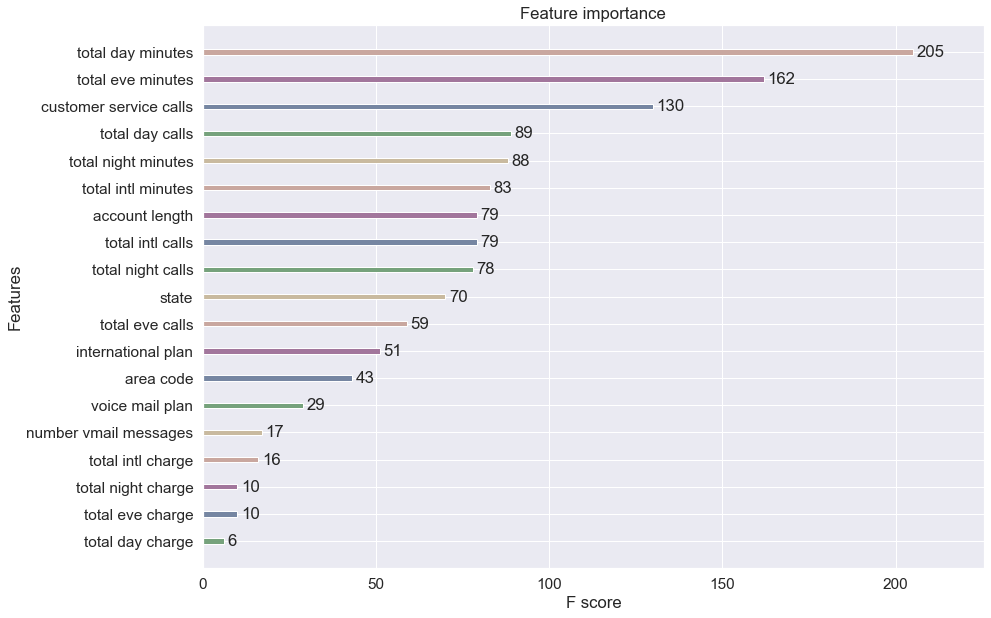

In [349]:
xgb.plot_importance(xg_clf,color=['#76a27c', '#7686a2', '#a2769c', '#c9a79f', '#c9ba9f'])
plt.rcParams['figure.figsize'] = [12, 8]
# plt.show()
plt.savefig('graphs_and_images/feature_importance_xgboost.png')

In [323]:
pd.DataFrame(confusion_matrix(y_test,xg_preds),columns=['Current','Churn'],index=['Current','Churn'])

Current  Churn
Current      559     13
Churn         17     78

In [338]:
print('The final model is Xgboost with scores:')
print()
justscore(y_test,xg_preds)

The final model is Xgboost with scores:



{'Accuracy': 0.9550224887556222,
 'F1_score': 0.8387096774193549,
 'Precision': 0.8571428571428571,
 'Recall': 0.8210526315789474}

### Model Summary

As we can see Xgboost outperformed its peers, though the voting classifier has the highest recall

In [244]:
models_df = pd.DataFrame(models_data)

In [249]:
models_df.sort_values(by=['F1_score'],ascending=False)

Accuracy  F1_score                                              Model  \
8  0.955022  0.838710  XGBClassifier(base_score=0.5, booster='gbtree'...   
6  0.950525  0.817680  (DecisionTreeClassifier(class_weight=None, cri...   
7  0.944528  0.814070  VotingClassifier(estimators=[('lr',\n         ...   
5  0.943028  0.802083  (DecisionTreeClassifier(class_weight=None, cri...   
4  0.922039  0.726316  GridSearchCV(cv=5, error_score='raise-deprecat...   
3  0.895052  0.675926  DecisionTreeClassifier(class_weight=None, crit...   
2  0.902549  0.673367  SVC(C=1.0, cache_size=200, class_weight=None, ...   
1  0.793103  0.496350  KNeighborsClassifier(algorithm='auto', leaf_si...   
0  0.748126  0.450980  LogisticRegression(C=1.0, class_weight=None, d...   

                                              Params  Precision    Recall  
8  {'objective': 'binary:logistic', 'base_score':...   0.857143  0.821053  
6  {'bootstrap': False, 'class_weight': None, 'cr...   0.860465  0.778947  
7  {'estimators': [('lr', LogisticRegression(C=1....   0.778846  0.852632  
5  {'bootstrap': True, 'class_weight': None, 'cri...   0.793814  0.810526  
4  {'cv': 5, 'error_score': 'raise-deprecating', ...   0.726316  0.726316  
3  {'class_weight': None, 'criterion': 'gini', 'm...   0.603306  0.768421  
2  {'C': 1.0, 'cache_size': 200, 'class_weight': ...   0.644231  0.705263  
1  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   0.379888  0.715789  
0  {'C': 1.0, 'class_weight': None, 'dual': False...   0.327014  0.726316